In [ ]:
# 9 november                         try linear

In [4]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [7]:
data = pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.shape

(768, 9)

In [9]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [12]:
select_col_df = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [13]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,120.894531,69.105469,20.536458,79.799479,31.992578


In [14]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [15]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)
    # print(data.loc[:,col])

In [16]:
# print(col)
# data.loc[:,col].median()

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


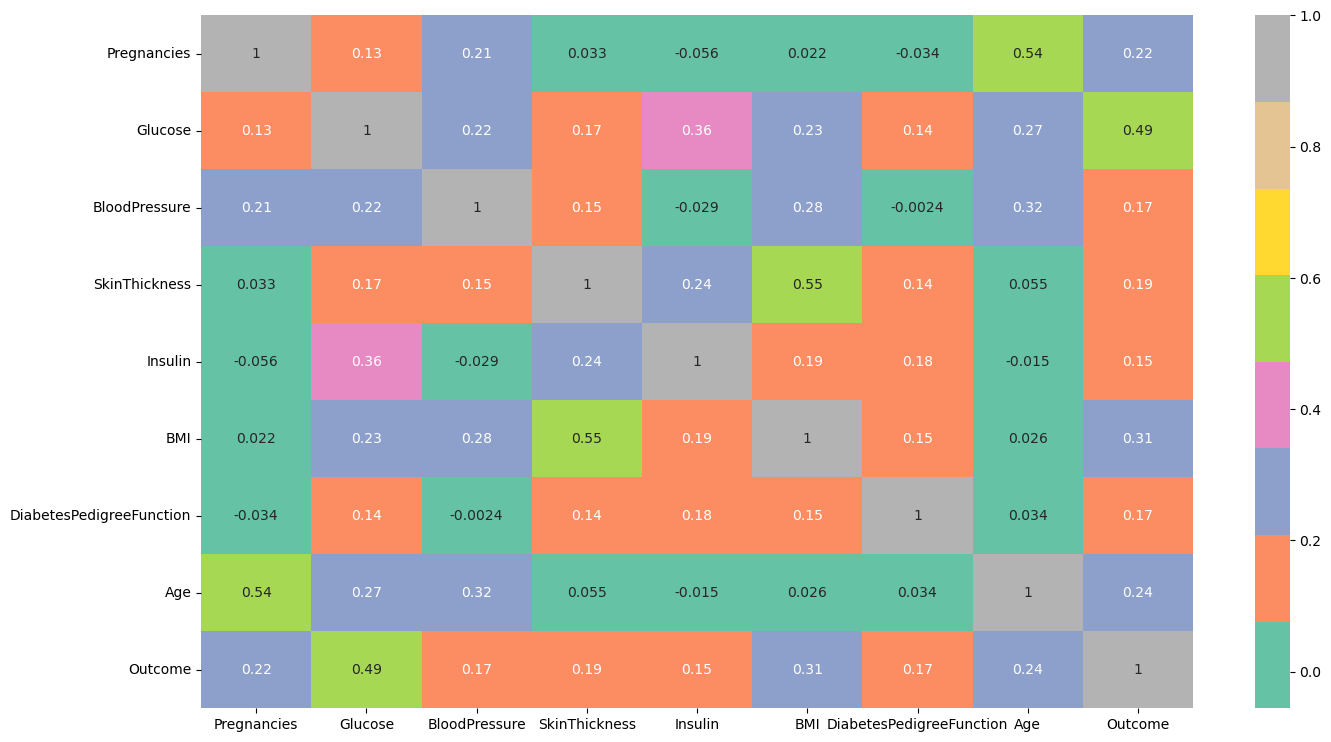

In [19]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


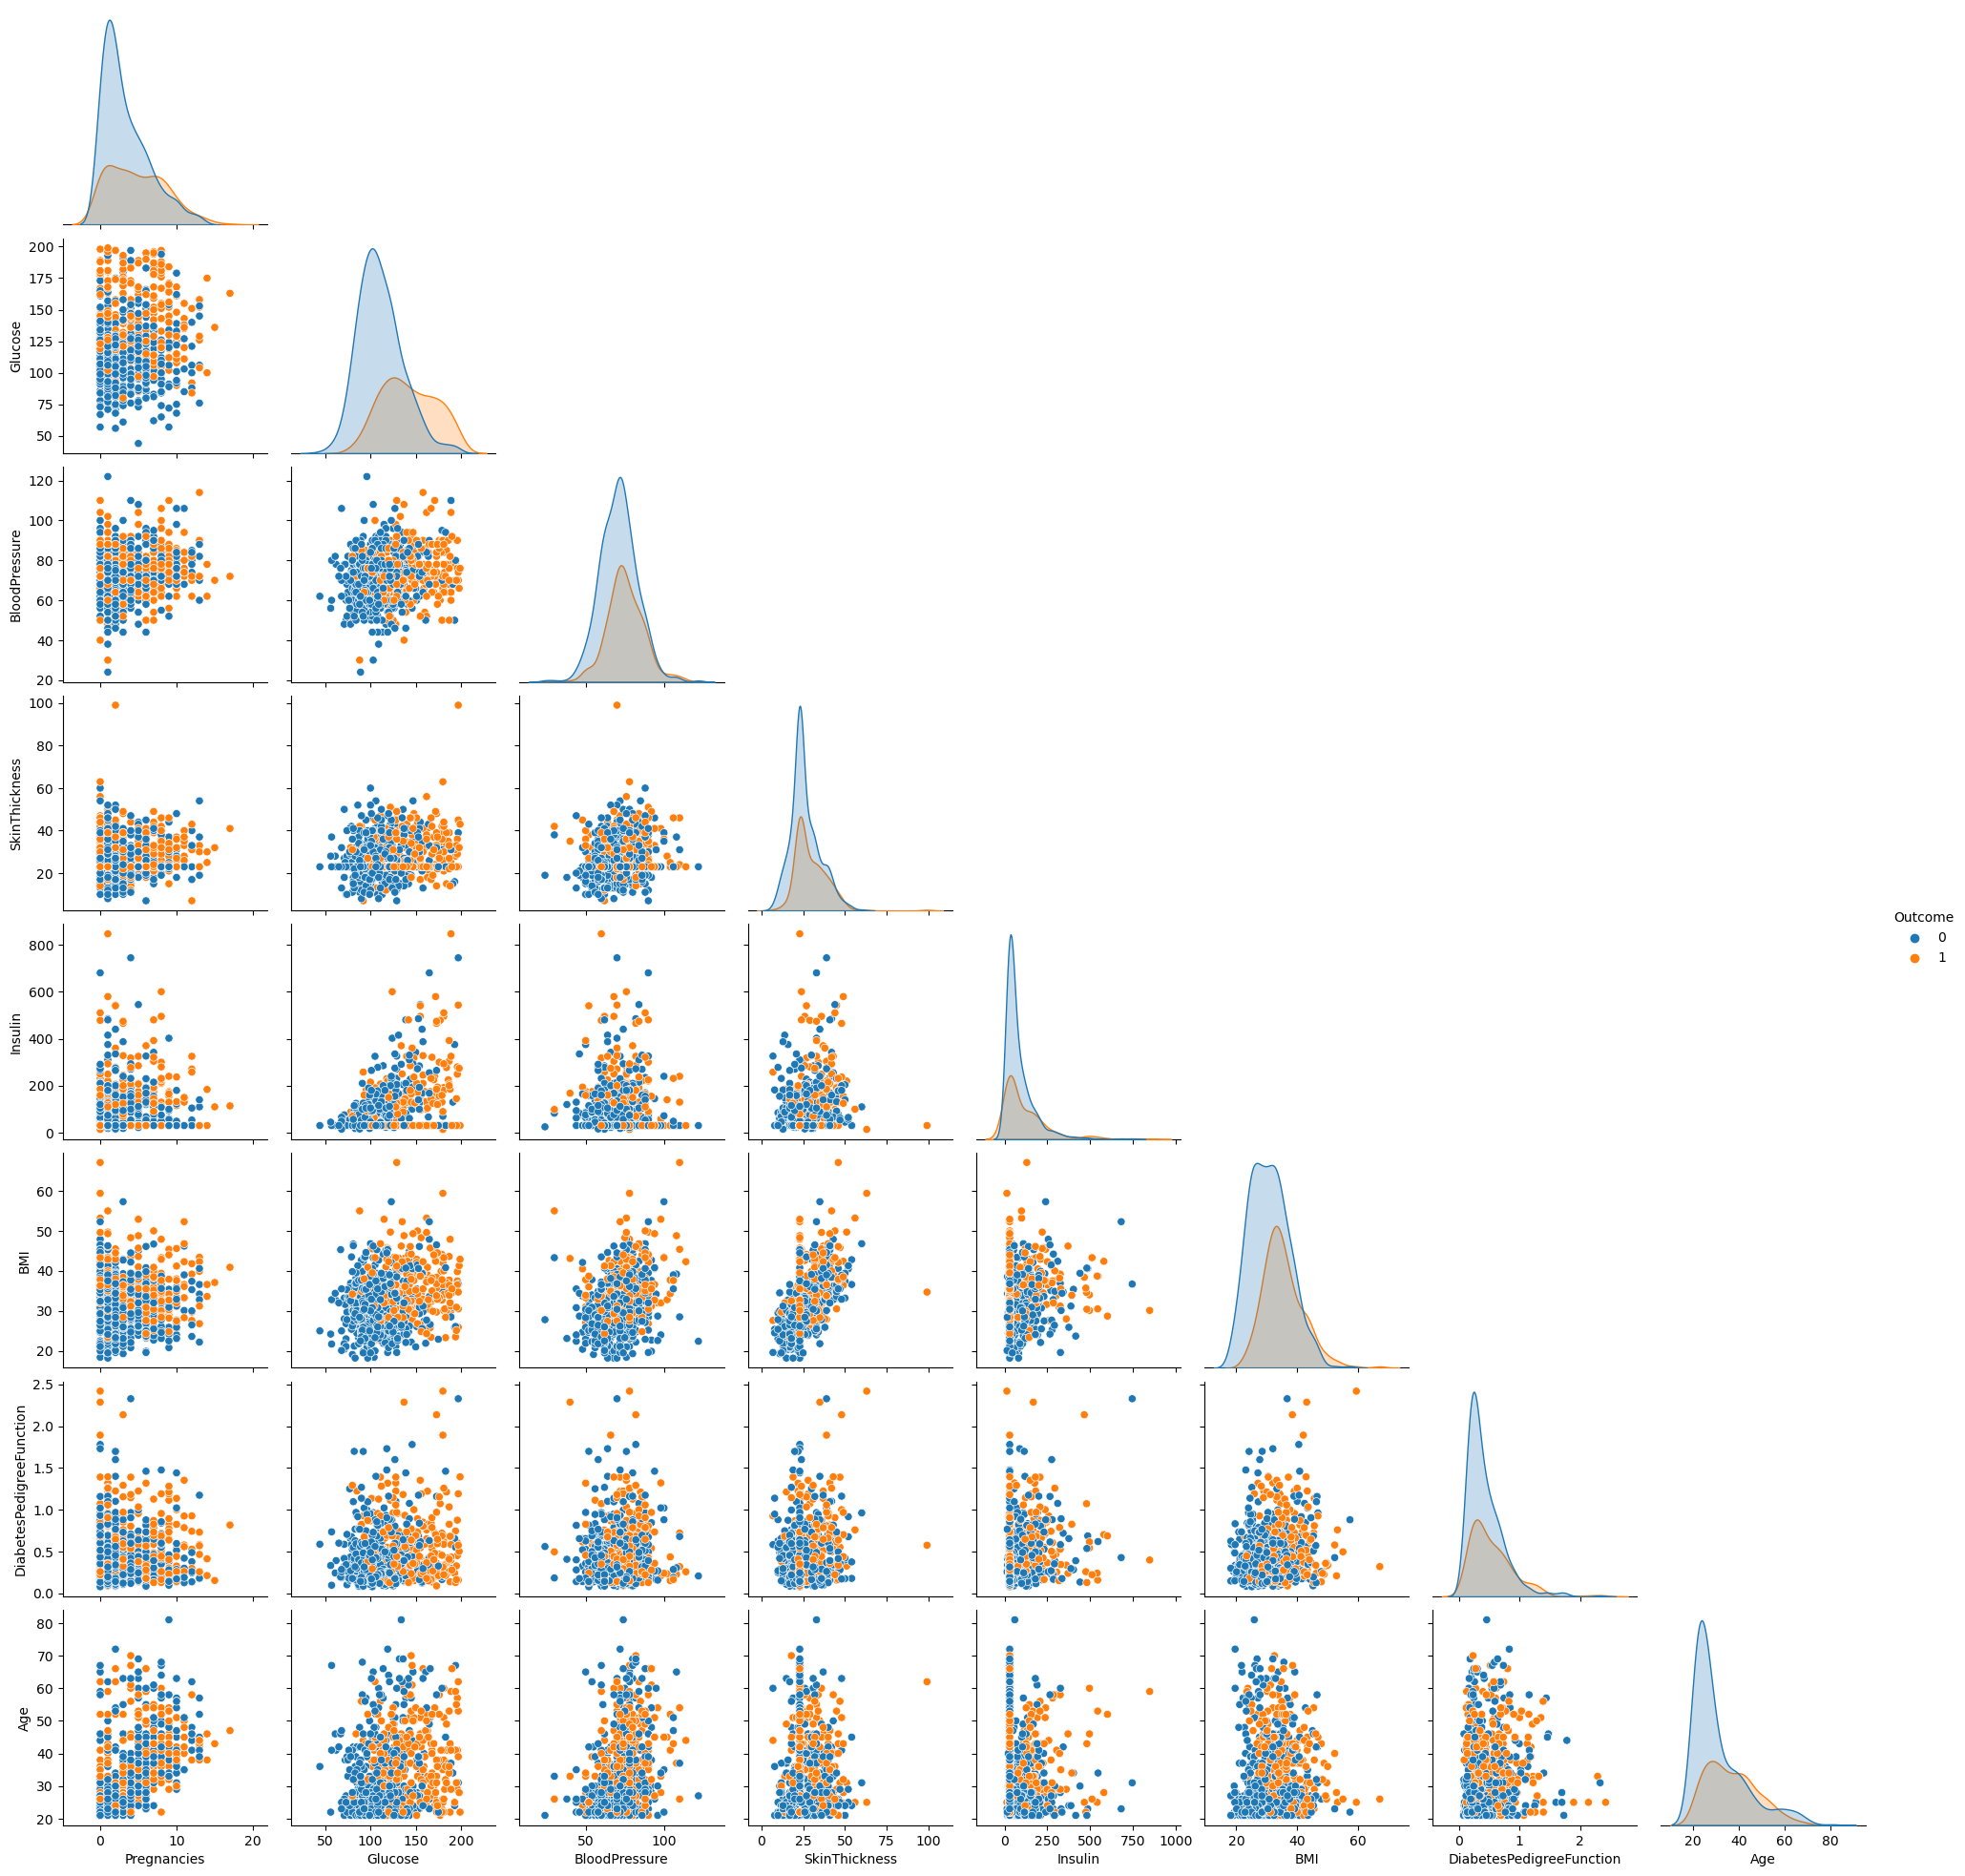

In [20]:
fig = sns.pairplot(data, hue="Outcome", diag_kind="kde", corner=True)
plt.show()

In [22]:
data.to_csv('cleaned_dibetic.csv')

In [24]:
# training and normalization of data
X = data.iloc[:,:8]
Y = data.iloc[:,8:]

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)


In [32]:
# Checking length
total_len = (len(X_train))
print("All total length = ",total_len)    # total row
print("X_train length and Y_train length = ", len(X_train),len(y_train))   #total train dataset length
print("X_test length and y_test length = ", len(X_test), len(y_test))  # total test dataset length

All total length =  614
X_train length and Y_train length =  614 614
X_test length and y_test length =  154 154


In [117]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train,y_train)

C:\Users\ushas\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=14)

In [118]:
predicted= KNN.predict(X_test)
predicted

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [122]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135.0,26.0,0.647,51
101,1,151,60,23,30.5,26.1,0.179,22
581,6,109,60,27,30.5,25.0,0.206,27
352,3,61,82,28,30.5,34.4,0.243,46
726,1,116,78,29,180.0,36.1,0.496,25
...,...,...,...,...,...,...,...,...
563,6,99,60,19,54.0,26.9,0.497,32
318,3,115,66,39,140.0,38.1,0.150,28
154,8,188,78,23,30.5,47.9,0.137,43
684,5,136,82,23,30.5,32.0,0.640,69


In [119]:
for i in range(len(y_test)):
    print("Predicted risk", predicted[i], "     Actual", y_test.values.tolist()[i][0])


Predicted risk 1      Actual 0
Predicted risk 1      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 1      Actual 1
Predicted risk 1      Actual 1
Predicted risk 0      Actual 0
Predicted risk 1      Actual 1
Predicted risk 0      Actual 1
Predicted risk 1      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 0      Actual 1
Predicted risk 0      Actual 1
Predicted risk 1      Actual 1
Predicted risk 1      Actual 1
Predicted risk 0      Actual 0
Predicted risk 0      Actual 0
Predicted risk 1      Actual 0
Predicted risk 1      Actual 1
Predicted risk 0      Actual 0
Predicted risk 1      Actual 1
Predicted risk 0      Actual 1
Predicted risk 0      Actual 0
Predicte

In [120]:
from sklearn.metrics import accuracy_score

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
accuracy = accuracy_score(y_test,predicted)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.92%


In [95]:
# Loop over different values of k
k = int(input("Enter k = "))
train_accuracy = []
test_accuracy = []

for i in range(0,k):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=i+1)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_acc = knn.score(X_train, y_train)
    train_accuracy.append(train_acc)

    #Compute accuracy on the testing set
    test_acc = knn.score(X_test, y_test)
    test_accuracy.append(test_acc)


print(train_accuracy)
print(test_accuracy)

Enter k = 30


C:\Users\ushas\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ushas\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ushas\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ushas\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[1.0, 0.8403908794788274, 0.8534201954397395, 0.8029315960912052, 0.7980456026058632, 0.7817589576547231, 0.7866449511400652, 0.7801302931596091, 0.7850162866449512, 0.7833876221498371, 0.7785016286644951, 0.7736156351791531, 0.7671009771986971, 0.762214983713355, 0.762214983713355, 0.7671009771986971, 0.7654723127035831, 0.7638436482084691, 0.755700325732899, 0.758957654723127, 0.757328990228013, 0.7638436482084691, 0.755700325732899, 0.762214983713355, 0.762214983713355, 0.7687296416938111, 0.7736156351791531, 0.755700325732899, 0.755700325732899, 0.760586319218241]
[0.7142857142857143, 0.7467532467532467, 0.7662337662337663, 0.7532467532467533, 0.7467532467532467, 0.7792207792207793, 0.7597402597402597, 0.7597402597402597, 0.7467532467532467, 0.7337662337662337, 0.7402597402597403, 0.7402597402597403, 0.7597402597402597, 0.7792207792207793, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7532467532467533, 0.7532467532467533, 0.7467532467532467, 0.7402597402597403, 0.76

C:\Users\ushas\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ushas\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [96]:
for i in range(k):
  print("Epoch",i+1,"acc difference ",test_accuracy[i] - train_accuracy[i])

Epoch 1 acc difference  -0.2857142857142857
Epoch 2 acc difference  -0.09363763272558068
Epoch 3 acc difference  -0.08718642920597319
Epoch 4 acc difference  -0.04968484284445196
Epoch 5 acc difference  -0.05129235585261649
Epoch 6 acc difference  -0.002538178433943883
Epoch 7 acc difference  -0.026904691399805447
Epoch 8 acc difference  -0.020390033419349418
Epoch 9 acc difference  -0.03826303989170443
Epoch 10 acc difference  -0.049621388383603415
Epoch 11 acc difference  -0.03824188840475484
Epoch 12 acc difference  -0.03335589491941282
Epoch 13 acc difference  -0.00736071745843736
Epoch 14 acc difference  0.017005795507424204
Epoch 15 acc difference  0.017005795507424204
Epoch 16 acc difference  0.005626295528575631
Epoch 17 acc difference  0.007254960023689638
Epoch 18 acc difference  -0.010596894961715786
Epoch 19 acc difference  -0.0024535724861457497
Epoch 20 acc difference  -0.012204407969880315
Epoch 21 acc difference  -0.01706924996827275
Epoch 22 acc difference  0.002390118

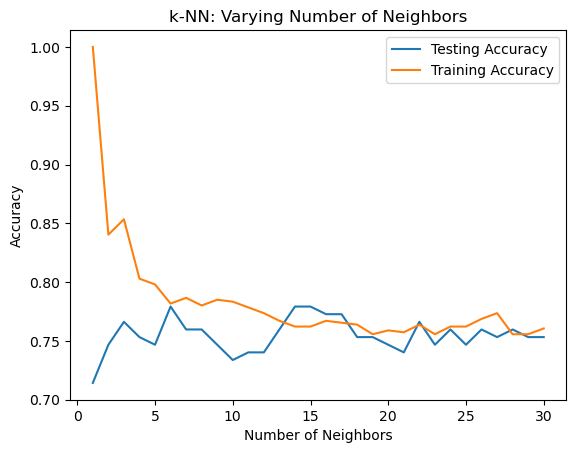

In [97]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
neighbors = [i for i in range(1,k+1)]
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [114]:
from sklearn.metrics import classification_report

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
report = classification_report(y_test, predicted)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [115]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predicted)
print(cm)

[[88 11]
 [23 32]]


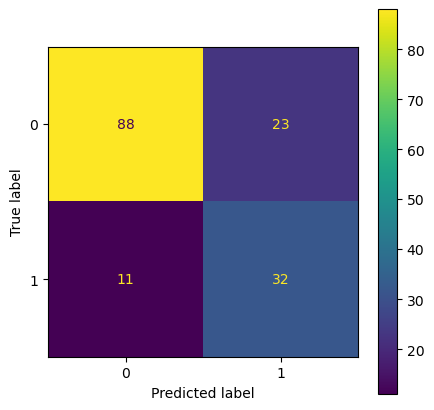

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(KNN.predict(X_test),y_test)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
class_names = ['0','1']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.grid(False)
# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);